In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import PassiveAggressiveRegressor


from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/BinanceCoin/BNB-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,16.263498,16.370699,15.539147,15.715951,15.715951,213428131
1,2019-12-01,15.743181,15.743181,15.054234,15.496336,15.496336,203268417
2,2019-12-02,15.509364,15.707174,15.152545,15.191858,15.191858,200809249
3,2019-12-03,15.191858,15.553175,15.048669,15.309556,15.309556,219927266
4,2019-12-04,15.348430,15.690587,15.009685,15.279978,15.279978,237605471
...,...,...,...,...,...,...,...
1092,2022-11-26,300.571747,316.962128,300.389465,311.388458,311.388458,1221554861
1093,2022-11-27,311.372040,316.219879,307.156372,307.429291,307.429291,793779029
1094,2022-11-28,307.399567,309.096100,289.493683,293.527252,293.527252,1154829072
1095,2022-11-29,293.491821,304.822815,289.763641,295.498169,295.498169,986451640


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03
mean,233.683955,241.619433,225.081995,233.893810,233.893810,1.540905e+09
std,193.398090,199.717979,186.202333,193.193967,193.193967,1.645666e+09
min,9.365420,10.236060,6.963391,9.386050,9.386050,1.365992e+08
25%,23.497103,24.331917,22.829552,23.551378,23.551378,3.958201e+08
50%,271.406616,278.432281,264.522980,271.504364,271.504364,1.139680e+09
75%,384.911804,396.772278,371.973328,384.873352,384.873352,2.055540e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


# **Data Pre-processing**

In [ ]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [ ]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

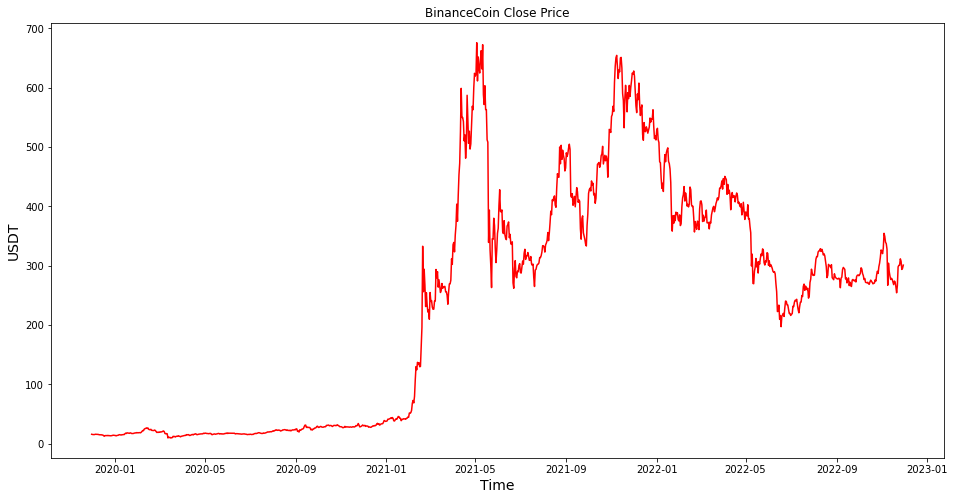

In [ ]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="red")
plt.title('BinanceCoin Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [ ]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,16.263498,16.370699,15.539147,15.715951,15.715951,213428131
1,2019-12-01,15.743181,15.743181,15.054234,15.496336,15.496336,203268417
2,2019-12-02,15.509364,15.707174,15.152545,15.191858,15.191858,200809249
3,2019-12-03,15.191858,15.553175,15.048669,15.309556,15.309556,219927266
4,2019-12-04,15.348430,15.690587,15.009685,15.279978,15.279978,237605471
...,...,...,...,...,...,...,...
846,2022-03-25,414.148254,421.153717,406.296051,410.811157,410.811157,1678265707
847,2022-03-26,410.816254,416.317535,407.981262,415.919800,415.919800,1082240527
848,2022-03-27,415.931366,431.025574,412.382904,430.503265,430.503265,1499505093
849,2022-03-28,430.546814,440.728394,428.565216,430.390869,430.390869,2128699500


In [ ]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,442.658875,451.961090,424.950287,428.916107,428.916107,2632534284
853,2022-04-01,429.124023,446.796539,414.749390,446.604279,446.604279,2718206274
854,2022-04-02,446.844208,453.558472,436.776703,436.955353,436.955353,2272901729
855,2022-04-03,436.865814,455.228455,432.821716,450.348877,450.348877,2128734028
856,2022-04-04,450.264557,450.432617,434.178009,447.524933,447.524933,2248856403
...,...,...,...,...,...,...,...
1092,2022-11-26,300.571747,316.962128,300.389465,311.388458,311.388458,1221554861
1093,2022-11-27,311.372040,316.219879,307.156372,307.429291,307.429291,793779029
1094,2022-11-28,307.399567,309.096100,289.493683,293.527252,293.527252,1154829072
1095,2022-11-29,293.491821,304.822815,289.763641,295.498169,295.498169,986451640


# **Feature Engineering**

In [ ]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,16.263498,16.370699,15.539147,15.715951,213428131
1,15.743181,15.743181,15.054234,15.496336,203268417
2,15.509364,15.707174,15.152545,15.191858,200809249
3,15.191858,15.553175,15.048669,15.309556,219927266
4,15.348430,15.690587,15.009685,15.279978,237605471


In [ ]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [ ]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


# **Model Selection**

In [ ]:
models = [LinearRegression(),
                svm.SVR(),
                RandomForestRegressor(n_estimators=30, n_jobs=-1, max_depth=20),
                DecisionTreeRegressor(),
                KNeighborsRegressor(),
                make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)),
                XGBRegressor(n_estimators=1000),
                PassiveAggressiveRegressor()
               ]

In [ ]:
name = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'KNeighborsRegressor', 'SGD Regressor', 'XGBRegressor', 'PassiveAggressiveRegressor']
mse = []
rmse = []
mae = []
r2 = []

for alg in models:
    
    alg.fit(X_train,y_train)
    y_pred=alg.predict(X_test)
    
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(sqrt(mean_absolute_error(y_test, y_pred)))   
    r2.append(r2_score(y_test, y_pred))  
    

results = pd.DataFrame({"Model Name": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2_SCORE": r2})
results

[17:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,MSE,RMSE,MAE,R2_SCORE
0,Linear Regression,0.001160,0.034052,0.160431,0.923223
1,Support Vector Regression,0.007593,0.087137,0.257837,0.497245
2,Random Forest Regressor,0.003232,0.056850,0.219471,0.786006
3,Decision Tree Regressor,0.007995,0.089415,0.261278,0.470617
4,KNeighborsRegressor,0.018946,0.137644,0.342718,-0.254473
5,SGD Regressor,0.002059,0.045374,0.186154,0.863678
6,XGBRegressor,0.003406,0.058365,0.212973,0.774444
7,PassiveAggressiveRegressor,0.106351,0.326116,0.546071,-6.041929


In [ ]:
print(f"Highest Recall Score achieved by {results.R2_SCORE.idxmax(axis = 0)} at = {max(results['R2_SCORE'] )}")
print(f"Highest Mean Squared Error achieved by {results['MSE'].idxmin(axis = 0)} at = {min(results['MSE'])}")
print(f"Best Root Mean Square Error achieved by {results['RMSE'].idxmin(axis = 0)} at = {min(results['RMSE'])}")
print(f"Best Mean Absolute Error achieved by {results['MAE'].idxmin(axis = 0)} at = {min(results['MAE'] )}")

Highest Recall Score achieved by 0 at = 0.9232231874075935
Highest Mean Squared Error achieved by 0 at = 0.0011595300272772787
Best Root Mean Square Error achieved by 0 at = 0.034051872595751306
Best Mean Absolute Error achieved by 0 at = 0.16043053742638547


# **Performance Evaluation**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

train_predict:  (564,)
test_predict:  (225,)


In [ ]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.0234174596407724
Train data MSE:  0.0005483774160272042
Train data MAE:  0.010094298298597692
Train data R2 score: 0.9913633930123931


In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.034051872595751306
Test data MSE:  0.0011595300272772787
Test data MAE:  0.02573795733891887
Test data R2 score: 0.9232231874075935


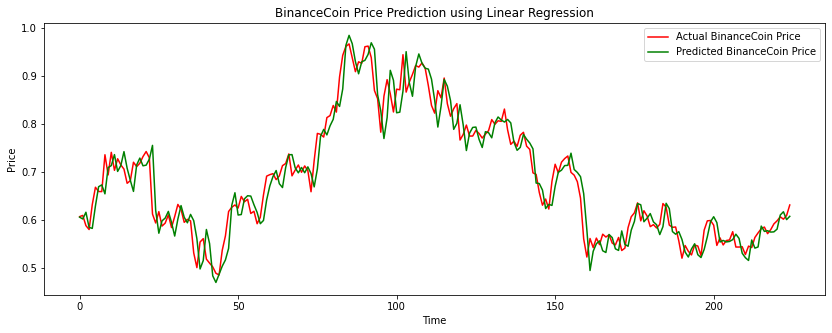

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual BinanceCoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted BinanceCoin Price')
plt.title('BinanceCoin Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()